In [71]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [72]:
df =pd.read_csv("/content/india-districts-census-2011.csv")

In [73]:
df

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816,19143,22673,36470,16610,19860,144,...,2316,4309,1370,838,2208,576,978,1554,1446,10027
636,637,PONDICHERRY,Karaikal,200222,97809,102413,154916,79903,75013,35348,...,1063,2408,665,340,1005,246,483,729,341,4890
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,15397,9935,0,...,685,1895,212,134,346,70,120,190,84,3151
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,43186,35497,0,...,685,1895,212,134,346,70,120,190,84,3151


In [74]:
df.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

In [75]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()

,district_code,state_name,district_name,population,male,female,literate,male_literate,female_literate,sc,...,power_parity_rs_90000_150000,power_parity_rs_45000_150000,power_parity_rs_150000_240000,power_parity_rs_240000_330000,power_parity_rs_150000_330000,power_parity_rs_330000_425000,power_parity_rs_425000_545000,power_parity_rs_330000_545000,power_parity_above_rs_545000,total_power_parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [76]:
df['sex_ratio'] = (df['female'] / df['male']) * 1000
df['literacy_rate'] = (df['literate'] / df['population']) * 100

In [77]:
df['sex_ratio'] = df['sex_ratio'].round(2)
df['literacy_rate'] = df['literacy_rate'].round(2)

In [78]:
df_clean = df[['state_name', 'district_name', 'population', 'sex_ratio', 'literacy_rate']]
df_clean.head()

,state_name,district_name,population,sex_ratio,literacy_rate
0,JAMMU AND KASHMIR,Kupwara,870354,835.45,50.51
1,JAMMU AND KASHMIR,Badgam,753745,893.64,44.53
2,JAMMU AND KASHMIR,Leh(Ladakh),133487,690.33,70.25
3,JAMMU AND KASHMIR,Kargil,140802,810.14,61.25
4,JAMMU AND KASHMIR,Punch,476835,892.96,54.89


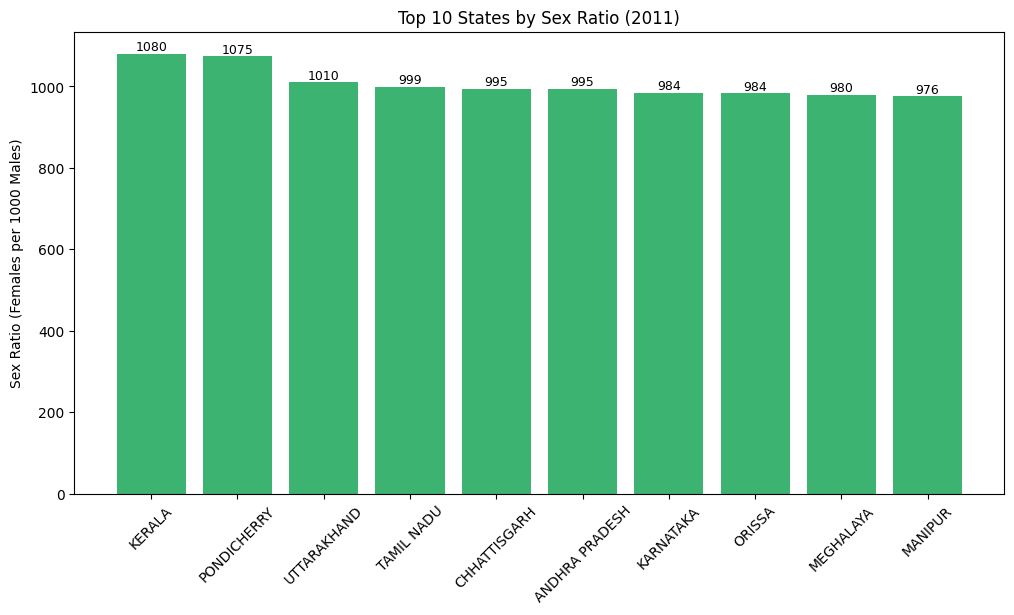

In [79]:
# Calculate average sex ratio per state
top_sex_ratio = df.groupby('state_name')['sex_ratio'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_sex_ratio.index, top_sex_ratio.values, color='mediumseagreen')
plt.xticks(rotation=45)
plt.title('Top 10 States by Sex Ratio (2011)')
plt.ylabel('Sex Ratio (Females per 1000 Males)')
plt.savefig("")
# Add numbers on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', va='bottom', ha='center', fontsize=9)


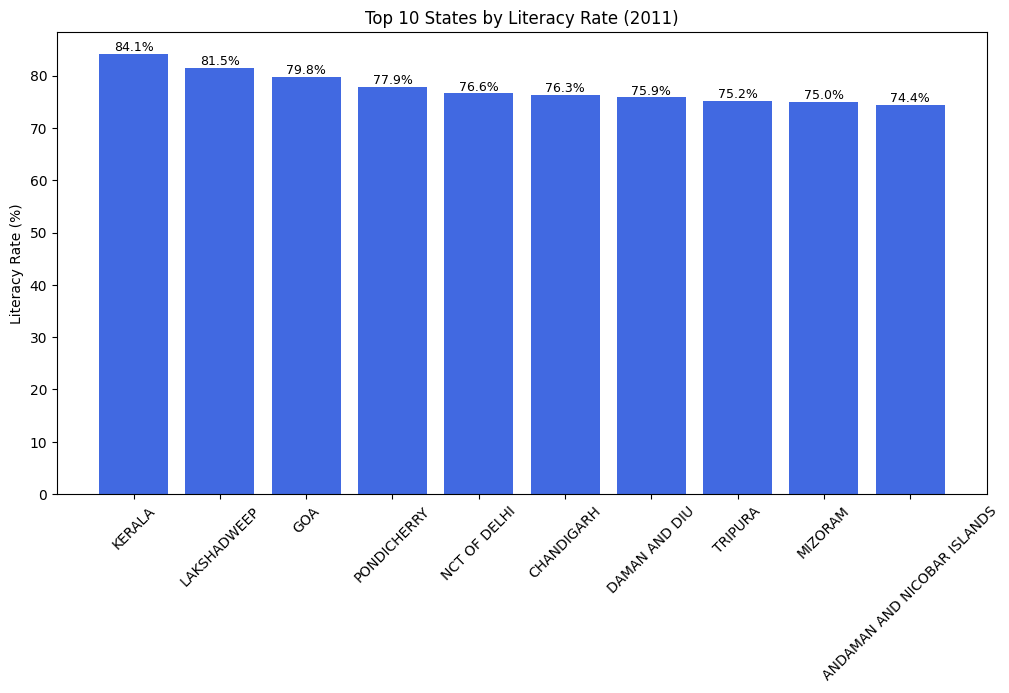

In [80]:
# Calculate average literacy rate per state
top_literacy = df.groupby('state_name')['literacy_rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_literacy.index, top_literacy.values, color='royalblue')
plt.xticks(rotation=45)
plt.title('Top 10 States by Literacy Rate (2011)')
plt.ylabel('Literacy Rate (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=9)


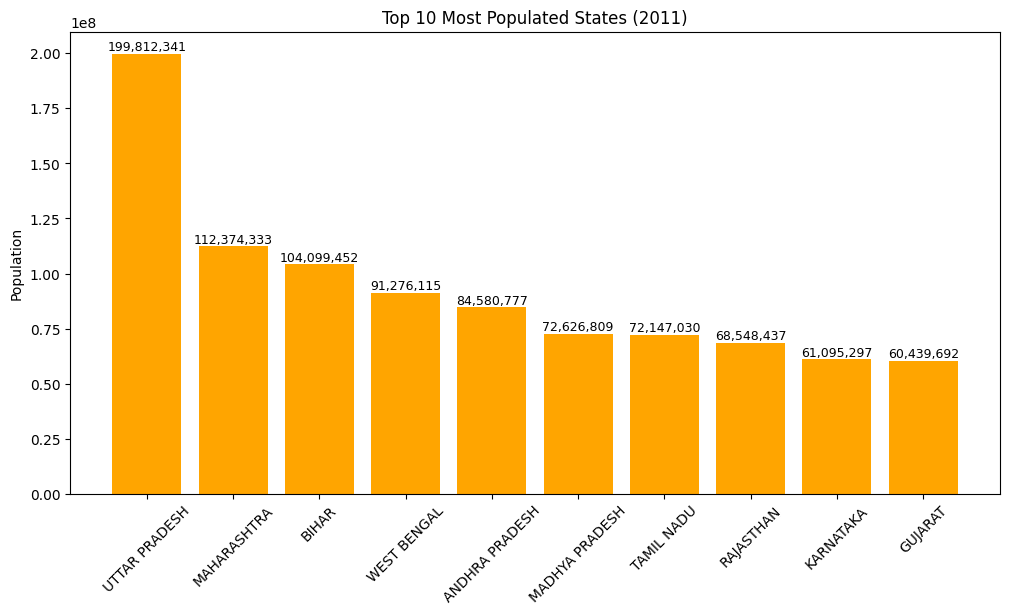

In [81]:
top_population_states = df.groupby('state_name')['population'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_population_states.index, top_population_states.values, color='orange')
plt.xticks(rotation=45)
plt.title('Top 10 Most Populated States (2011)')
plt.ylabel('Population')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', va='bottom', ha='center', fontsize=9)


In [82]:
##taken from online sources as per 2011

state_area_dict = {
    'Uttar Pradesh': 243286,
    'Maharashtra': 307713,
    'Bihar': 94163,
    'West Bengal': 88752,
    'Madhya Pradesh': 308350,
    'Tamil Nadu': 130058,
    'Rajasthan': 342239,
    'Karnataka': 191791,
    'Gujarat': 196024,
    'Andhra Pradesh': 275045,  # undivided (includes Telangana)
    'Orissa': 155707,
    'Kerala': 38852,
    'Jharkhand': 79714,
    'Assam': 78438,
    'Punjab': 50362,
    'Chhattisgarh': 135192,
    'Haryana': 44212,
    'Nct Of Delhi': 1484,
    'Jammu and Kashmir': 222236,
    'Uttarakhand': 53483,
    'Himachal Pradesh': 55673,
    'Tripura': 10486,
    'Meghalaya': 22429,
    'Manipur': 22327,
    'Nagaland': 16579,
    'Goa': 3702,
    'Arunachal Pradesh': 83743,
    'Mizoram': 21081,
    'Sikkim': 7096,
    'Pondicherry': 479,
    'Chandigarh': 114,
    'Dadra and Nagar Haveli': 491,
    'Daman and Diu': 112,
    'Andaman and Nicobar Islands': 8249,
    'Lakshadweep': 32
}


In [83]:
# Summarizing required metrics per state
summary_df = df.groupby('state_name').agg({
    'population': 'sum',
    'literacy_rate': 'mean',
    'sex_ratio': 'mean'
}).reset_index()

# Add area from the area dictionary
summary_df['area_sq_km'] = summary_df['state_name'].map(state_area_dict)

# Calculate population density
summary_df['pop_density'] = summary_df['population'] / summary_df['area_sq_km']

# Clean up column names
summary_df.rename(columns={
    'state_name': 'State',
    'population': 'Total Population',
    'literacy_rate': 'Average Literacy Rate',
    'sex_ratio': 'Average Sex Ratio',
    'area_sq_km': 'Area (sq.km)',
    'pop_density': 'Population Density'
}, inplace=True)

# Round off values for readability
summary_df['Average Literacy Rate'] = summary_df['Average Literacy Rate'].round(2)
summary_df['Average Sex Ratio'] = summary_df['Average Sex Ratio'].round(0)
summary_df['Population Density'] = summary_df['Population Density'].round(2)

summary_df.sort_values(by='Total Population', ascending=False).head(10)

,State,Total Population,Average Literacy Rate,Average Sex Ratio,Area (sq.km),Population Density
32,UTTAR PRADESH,199812341,57.09,909.0,NaN,NaN
19,MAHARASHTRA,112374333,71.41,948.0,NaN,NaN
4,BIHAR,104099452,50.39,918.0,NaN,NaN
34,WEST BENGAL,91276115,66.17,950.0,NaN,NaN
1,ANDHRA PRADESH,84580777,59.14,995.0,NaN,NaN
18,MADHYA PRADESH,72626809,57.56,936.0,NaN,NaN
30,TAMIL NADU,72147030,71.23,999.0,NaN,NaN
28,RAJASTHAN,68548437,54.52,930.0,NaN,NaN
15,KARNATAKA,61095297,65.20,984.0,NaN,NaN
10,GUJARAT,60439692,66.51,938.0,NaN,NaN


In [84]:
summary_df['State'] = summary_df['State'].str.title()

In [85]:
summary_df['Area (sq.km)'] = summary_df['State'].map(state_area_dict)
summary_df['Population Density'] = summary_df['Total Population'] / summary_df['Area (sq.km)']

In [86]:
print(summary_df[['State', 'Area (sq.km)', 'Population Density']].isnull().sum())

State                 0
Area (sq.km)          4
Population Density    4
dtype: int64


got null values so checking by printing all  the states and rechecking

In [87]:
print(summary_df['State'].unique())

['Andaman And Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra And Nagar Haveli'
 'Daman And Diu' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu And Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Nct Of Delhi' 'Orissa' 'Pondicherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [88]:
print(list(state_area_dict.keys()))

['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Madhya Pradesh', 'Tamil Nadu', 'Rajasthan', 'Karnataka', 'Gujarat', 'Andhra Pradesh', 'Orissa', 'Kerala', 'Jharkhand', 'Assam', 'Punjab', 'Chhattisgarh', 'Haryana', 'Nct Of Delhi', 'Jammu and Kashmir', 'Uttarakhand', 'Himachal Pradesh', 'Tripura', 'Meghalaya', 'Manipur', 'Nagaland', 'Goa', 'Arunachal Pradesh', 'Mizoram', 'Sikkim', 'Pondicherry', 'Chandigarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Andaman and Nicobar Islands', 'Lakshadweep']


In [89]:
# Clean state names
summary_df['State'] = summary_df['State'].str.strip().str.title()

# Also fix dictionary keys
state_area_dict_cleaned = {k.strip().title(): v for k, v in state_area_dict.items()}

# Map area again
summary_df['Area (sq.km)'] = summary_df['State'].map(state_area_dict_cleaned)
summary_df['Population Density'] = summary_df['Total Population'] / summary_df['Area (sq.km)']


In [90]:
print(summary_df[['State', 'Area (sq.km)', 'Population Density']].isnull().sum())


State                 0
Area (sq.km)          0
Population Density    0
dtype: int64


In [91]:
## population by state bar chart

/tmp/ipython-input-92-4273273380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sorted_df, y='State', x='Total Population', palette='viridis')


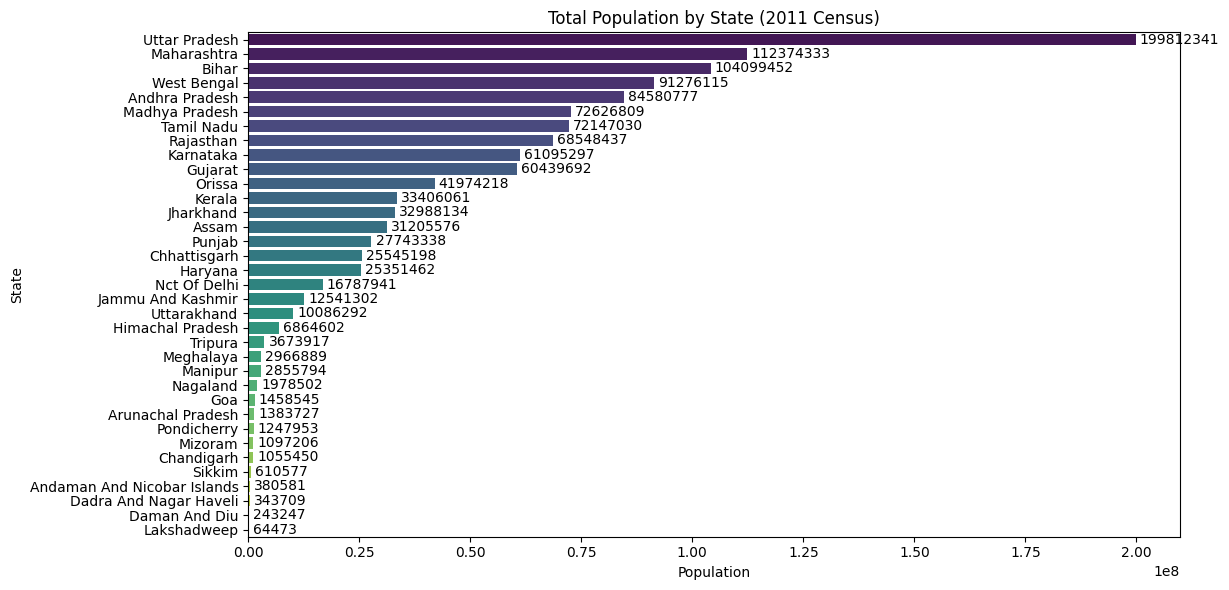

In [92]:
plt.figure(figsize=(12, 6))
sorted_df = summary_df.sort_values(by='Total Population', ascending=False)
ax = sns.barplot(data=sorted_df, y='State', x='Total Population', palette='viridis')

plt.title("Total Population by State (2011 Census)")
plt.xlabel("Population")
plt.ylabel("State")
plt.tight_layout()

# Add population numbers on top of each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', padding=3)

plt.show()


In [93]:
##Literacy Rate – Horizontal Bar Chart

/tmp/ipython-input-94-2129942791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sorted_df, x='Average Literacy Rate', y='State', palette='mako')


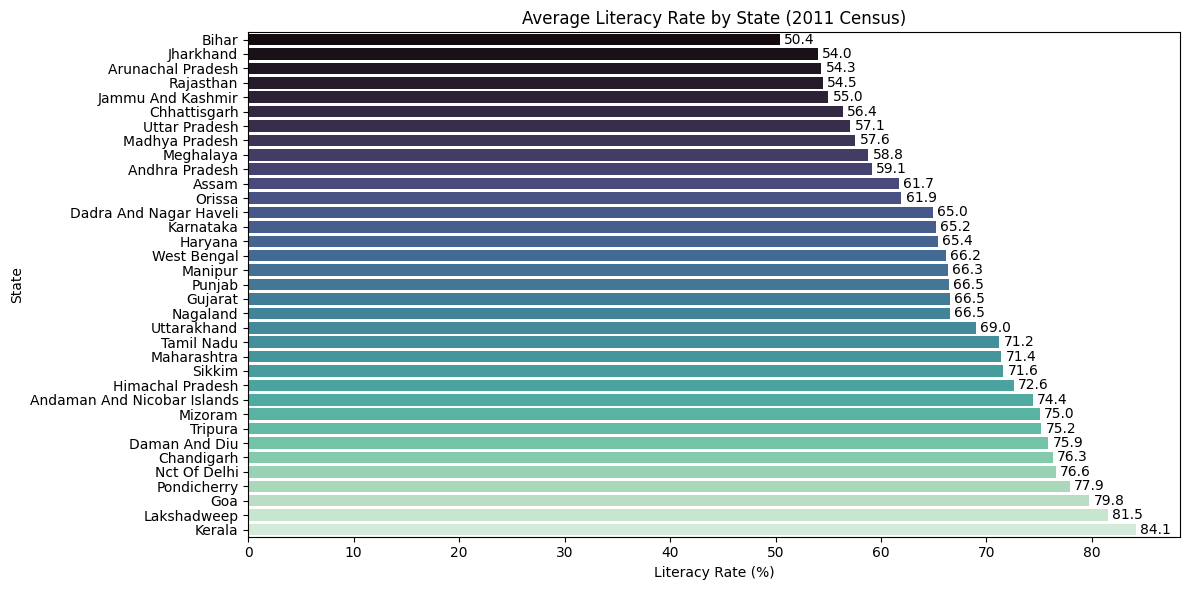

In [94]:
plt.figure(figsize=(12, 6))
sorted_df = summary_df.sort_values(by='Average Literacy Rate', ascending=True)
ax = sns.barplot(data=sorted_df, x='Average Literacy Rate', y='State', palette='mako')

plt.title("Average Literacy Rate by State (2011 Census)")
plt.xlabel("Literacy Rate (%)")
plt.ylabel("State")
plt.tight_layout()

# Add literacy rate values on the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f', label_type='edge', padding=3)

plt.show()

In [95]:
## population Density - Heatmap

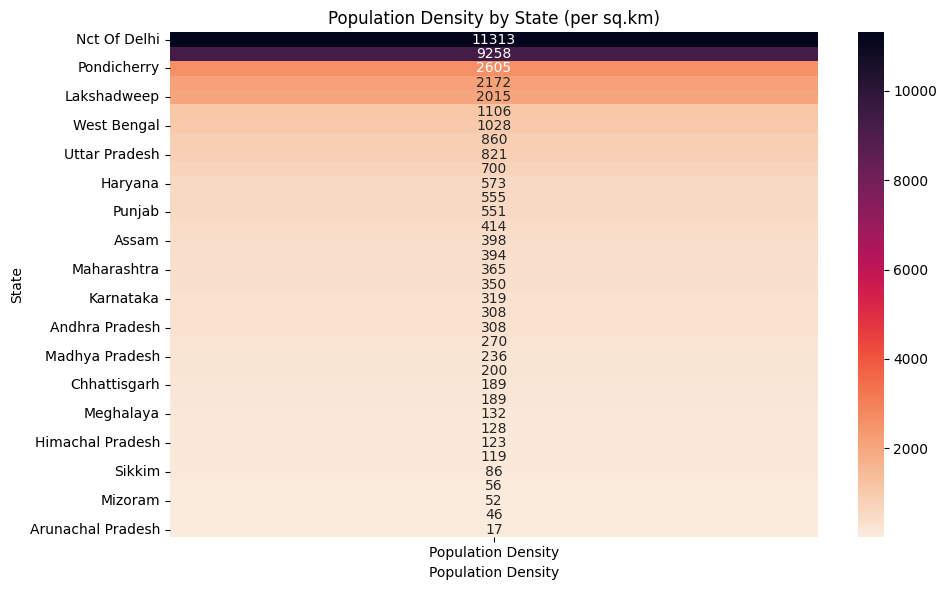

In [96]:
plt.figure(figsize=(10, 6))
density_sorted = summary_df.sort_values(by='Population Density', ascending=False)
sns.heatmap(density_sorted[['Population Density']].set_index(density_sorted['State']), cmap='rocket_r', annot=True, fmt='.0f')
plt.title("Population Density by State (per sq.km)")
plt.xlabel("Population Density")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [97]:
## coorelation analysis

In [98]:
print(summary_df.columns.tolist())

['State', 'Total Population', 'Average Literacy Rate', 'Average Sex Ratio', 'Area (sq.km)', 'Population Density']


In [99]:
numeric_cols = ['Total Population', 'Average Literacy Rate', 'Average Sex Ratio', 'Area (sq.km)', 'Population Density']

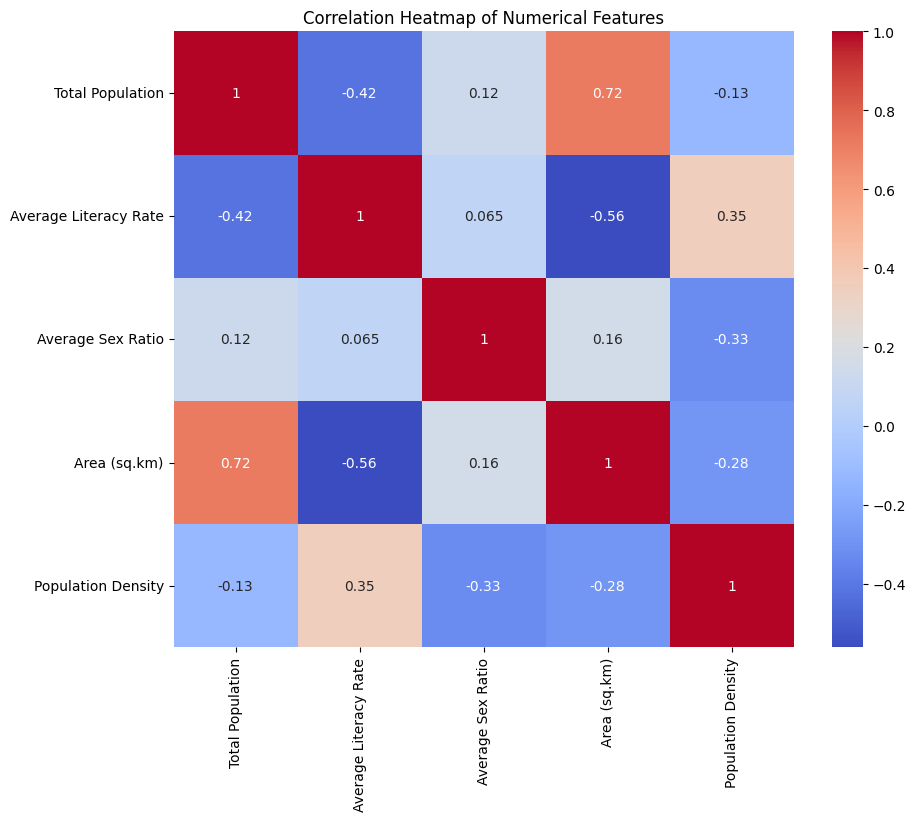

In [100]:
corr = summary_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [101]:
# Gender Gap (difference from ideal sex ratio of 1000)
summary_df['Gender Gap'] = abs(summary_df['Average Sex Ratio'] - 1000)

# Literacy Gap
summary_df['Literacy Gap'] = 100 - summary_df['Average Literacy Rate']

# Preview new columns
summary_df[['State', 'Gender Gap', 'Literacy Gap']].head()

,State,Gender Gap,Literacy Gap
0,Andaman And Nicobar Islands,142.0,25.61
1,Andhra Pradesh,5.0,40.86
2,Arunachal Pradesh,80.0,45.66
3,Assam,42.0,38.31
4,Bihar,82.0,49.61


/tmp/ipython-input-102-346731607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df.sort_values('Gender Gap', ascending=False), x='State', y='Gender Gap', palette='viridis')


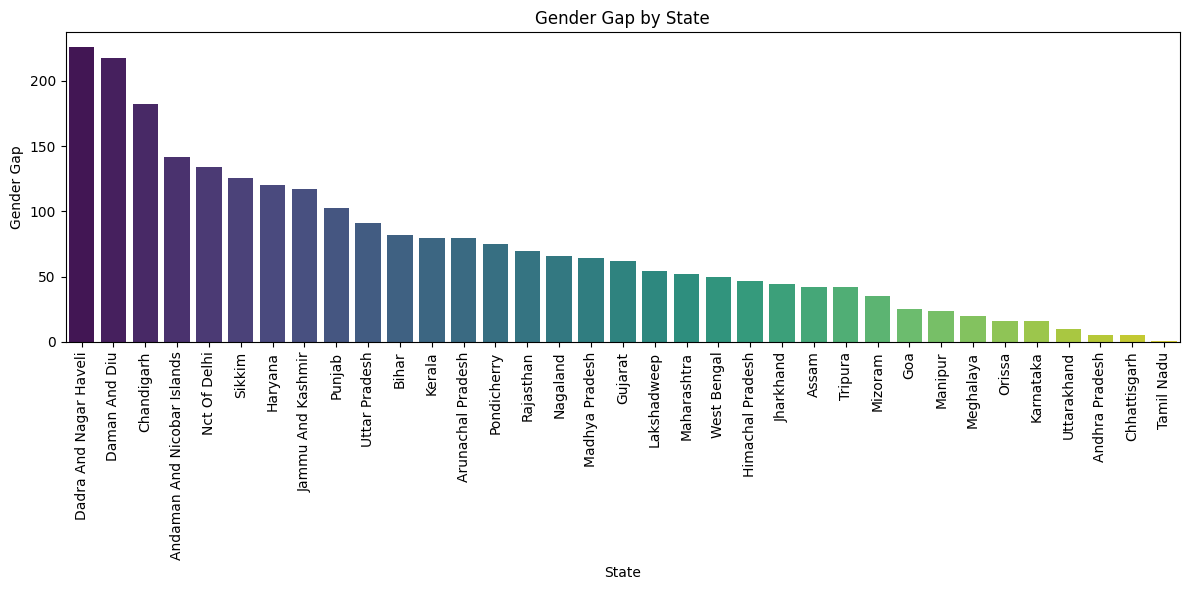

/tmp/ipython-input-102-346731607.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df.sort_values('Literacy Gap', ascending=False), x='State', y='Literacy Gap', palette='coolwarm')


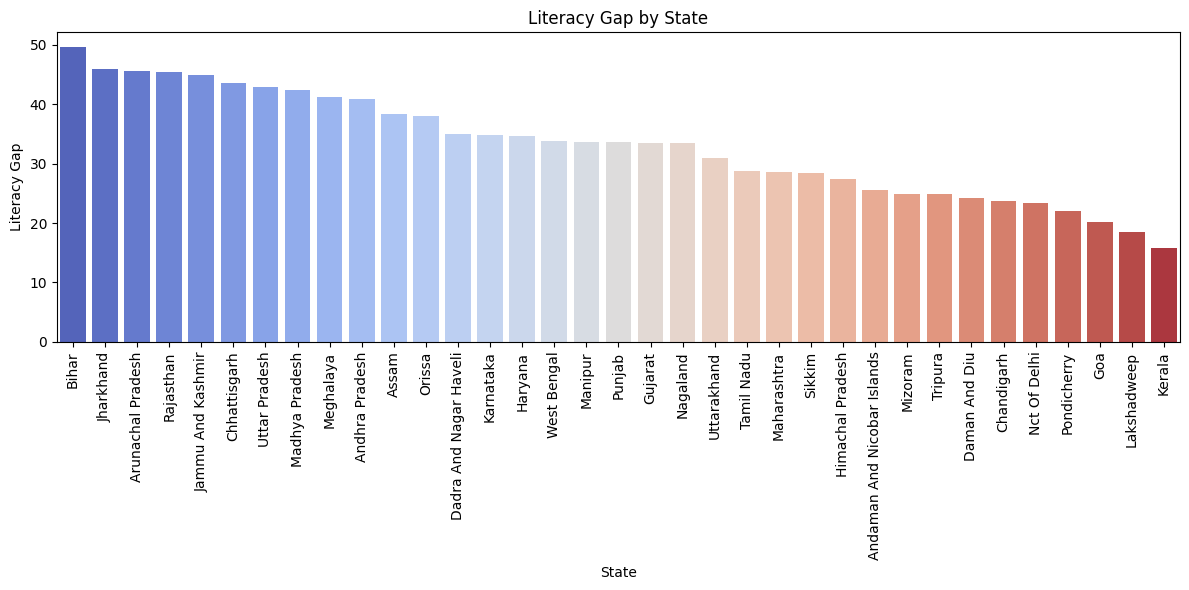

In [102]:
# Bar plot for Gender Gap
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df.sort_values('Gender Gap', ascending=False), x='State', y='Gender Gap', palette='viridis')
plt.xticks(rotation=90)
plt.title('Gender Gap by State')
plt.tight_layout()
plt.show()

# Bar plot for Literacy Gap
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df.sort_values('Literacy Gap', ascending=False), x='State', y='Literacy Gap', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Literacy Gap by State')
plt.tight_layout()
plt.show()